In [32]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [33]:
# X-Data 
N = 200 
X = np.random.random(N)

# Generation Y-Data
sign = (- np.ones((N,)))**np.random.randint(2,size=N) 
Y = np.sqrt(X) * sign

In [34]:
act = tf.keras.layers.ReLU() 
# Model
nn_dp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=act), 
    tf.keras.layers.Dense(10, activation=act),
    tf.keras.layers.Dense(1, activation='linear')])

In [35]:
#Loss 
mse = tf.keras.losses.MeanSquaredError() 
def loss_dp(y_true, y_pred): 
    return mse(y_true,y_pred**2)

optimizer_dp = tf.keras.optimizers.Adam(learning_rate=0.001) 
nn_dp.compile(optimizer=optimizer_dp, loss=loss_dp)

In [36]:
#Training 
results_dp = nn_dp.fit(X, X, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
40/40 [==============================] - 0s 2ms/step - loss: 0.2241
Epoch 2/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 5/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0018


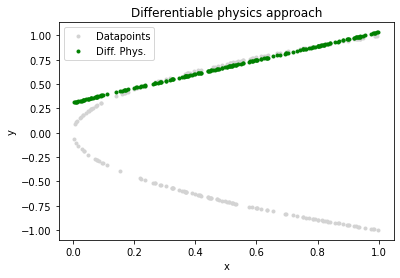

In [37]:
# Results 
plt.plot(X,Y,'.',label='Datapoints', color="lightgray") 
#plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red") 
# optional for comparison 
plt.plot(X,nn_dp.predict(X),'.',label='Diff. Phys.', color="green") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Differentiable physics approach') 
plt.legend() 
plt.show()